# MLP Implementation by TensorFlow

In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [16]:
def load_data():
    df = pd.read_csv('./task1.csv',index_col=0)
    train_set, test_set = train_test_split(df, test_size=0.15, shuffle=True)    #data divide

    #train
    X_train = train_set.values[:,:2]
    #y_train = np.array([train_set.values[:,2]]).T
    profession = train_set.values[:,2]
    profession_enc = preprocessing.LabelEncoder().fit_transform(profession).reshape(-1,1)
    y_train = OneHotEncoder().fit_transform(profession_enc).toarray()   #one-hot vectorize

    #test
    X_test = test_set.values[:,:2]
    #y_test = np.array([test_set.values[:,2]]).T
    profession = test_set.values[:,2]
    profession_enc = preprocessing.LabelEncoder().fit_transform(profession).reshape(-1,1)
    y_test = OneHotEncoder().fit_transform(profession_enc).toarray()    #one-hot vectorize


    #print(len(X_train), len(y_train))
    #print(len(X_test), len(y_test))

    return X_train, y_train, X_test, y_test

In [4]:
# Hidden Layer
class HiddenLayer(object):
    def __init__(self, input, n_in, n_out):
        self.input = input

        w_h = tf.Variable(tf.random_normal([n_in,n_out],mean=0.0,stddev=0.05))
        b_h = tf.Variable(tf.zeros([n_out]))

        self.w = w_h
        self.b = b_h
        self.params = [self.w, self.b]

    def output(self):
        linarg = tf.matmul(self.input, self.w) + self.b

        #keep_prob = tf.placeholder(tf.float32)
        #h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

        self.output = tf.nn.tanh(linarg)  # switch relu() to tanh()

        return self.output

In [5]:
# Output Layer
class OutLayer(object):
    def __init__(self, input, n_in, n_out):
        self.input = input

        w_o = tf.Variable(tf.random_normal([n_in,n_out],mean=0.0,stddev=0.05))
        b_o = tf.Variable(tf.zeros([n_out]))

        self.w = w_o
        self.b = b_o
        self.params = [self.w, self.b]

    def output(self):
        linarg = tf.matmul(self.input, self.w) + self.b
        self.output = tf.nn.softmax(linarg)

        return self.output

In [6]:
# Create the model
def mk_NN_model():
    # Define network structure

    h_layer1 = HiddenLayer(input=x, n_in=2, n_out=20)
    #h_layer1_drop = tf.nn.dropout(h_layer1.output(), keep_prob)
    h_layer2 = HiddenLayer(input=h_layer1.output(), n_in=20, n_out=10)
    #h_layer2 = HiddenLayer(input=h_layer1_drop, n_in=20, n_out=10)
    o_layer = OutLayer(input=h_layer2.output(), n_in=10, n_out=3)

    # Cost Function basic term
    out = o_layer.output()
    cross_entropy = -tf.reduce_sum(y_*tf.log(out), name='xentropy')

    # Regularization terms (weight decay)
    L2_sqr = (tf.nn.l2_loss(h_layer1.w)
              + tf.nn.l2_loss(h_layer2.w)
              + tf.nn.l2_loss(o_layer.w))
    lambda_2 = 0.01

    # the loss and accuracy
    loss = cross_entropy + lambda_2 * L2_sqr
    correct_prediction = tf.equal(tf.argmax(out,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    return loss, accuracy

In [7]:
train_x, train_y, test_x, test_y = load_data()

epoch = 10000

# Variables
x = tf.placeholder("float", [None, 2])
y_ = tf.placeholder("float", [None, 3])

loss, accuracy = mk_NN_model()
loss_list = []
acc_list = []
keep_prob = tf.placeholder(tf.float32)
# Train
optimizer = tf.train.AdagradOptimizer(0.01)
train_op = optimizer.minimize(loss)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    print('Training...')
    for i in range(epoch + 1):
        train_op.run({x: train_x, y_: train_y})
        loss_list.append(loss.eval({x:train_x, y_: train_y}))
        acc_list.append(accuracy.eval({x: train_x, y_: train_y}))
        if i % 1000 == 0:                # echo status on screen
            train_accuracy = accuracy.eval({x: train_x, y_: train_y})
            train_loss = loss.eval({x:train_x, y_: train_y})
            print("epoch",i,"| acc:", train_accuracy,"\tloss:", train_loss)

    # Test trained model
    print("accuracy:", accuracy.eval({x: test_x, y_: test_y}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...
epoch 0 | acc: 0.05427451 	loss: 13889.905
epoch 1000 | acc: 0.948 	loss: 2018.3586
epoch 2000 | acc: 0.9500392 	loss: 1842.8429
epoch 3000 | acc: 0.9512941 	loss: 1789.6332
epoch 4000 | acc: 0.9516078 	loss: 1769.9423
epoch 5000 | acc: 0.951451 	loss: 1757.1246
epoch 6000 | acc: 0.9517647 	loss: 1746.8024
epoch 7000 | acc: 0.95215684 	loss: 1737.8699
epoch 8000 | acc: 0.9520784 	loss: 1730.4807
epoch 9000 | acc: 0.952 	loss: 1724.4266
epoch 10000 | acc: 0.95184314 	loss: 1719.3022
accuracy: 0.94133335


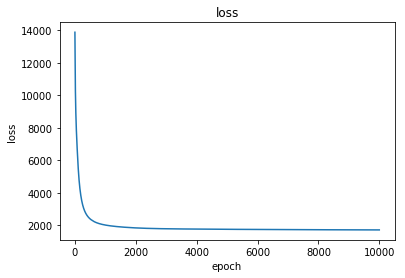

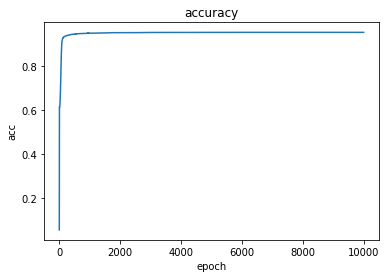

In [12]:
#drow loss & accuracy curve
import matplotlib.pyplot as plt

plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(loss_list)
plt.show()

plt.title("accuracy")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.plot(acc_list)
plt.show()